In [252]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [253]:
data = yf.download('AAPL','2008-01-01','2023-03-15')

[*********************100%***********************]  1 of 1 completed


In [254]:
recent_data = yf.download('AAPL', '2023-03-16')

[*********************100%***********************]  1 of 1 completed


In [255]:
recent_data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-16,152.160004,156.460007,151.639999,155.850006,155.850006,76161100
2023-03-17,156.080002,156.740005,154.279999,155.000000,155.000000,98862500
2023-03-20,155.070007,157.820007,154.149994,157.399994,157.399994,73556400


In [256]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,7.116786,7.152143,6.876786,6.958571,5.922568,1079178800
2008-01-03,6.978929,7.049643,6.881786,6.961786,5.925305,842066400
2008-01-04,6.837500,6.892857,6.388929,6.430357,5.472994,1455832000
2008-01-07,6.473214,6.557143,6.079643,6.344286,5.399739,2072193200
2008-01-08,6.433571,6.516429,6.100000,6.116071,5.205501,1523816000


In [257]:
data.shape

(3826, 6)

In [258]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,7.116786,7.152143,6.876786,6.958571,5.922568,1079178800
2008-01-03,6.978929,7.049643,6.881786,6.961786,5.925305,842066400
2008-01-04,6.837500,6.892857,6.388929,6.430357,5.472994,1455832000
2008-01-07,6.473214,6.557143,6.079643,6.344286,5.399739,2072193200
2008-01-08,6.433571,6.516429,6.100000,6.116071,5.205501,1523816000
2008-01-09,6.117857,6.410714,6.010714,6.407143,5.453238,1813882000
2008-01-10,6.342143,6.464286,6.264643,6.357857,5.411289,1482975200
2008-01-11,6.285714,6.351786,6.071429,6.167500,5.249272,1232285600
2008-01-14,6.340000,6.407857,6.256071,6.385000,5.434391,1100450400


In [259]:
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-01,146.830002,147.229996,145.009995,145.309998,145.309998,55479000
2023-03-02,144.380005,146.710007,143.899994,145.910004,145.910004,52238100
2023-03-03,148.039993,151.110001,147.330002,151.029999,151.029999,70668500
2023-03-06,153.789993,156.300003,153.460007,153.830002,153.830002,87558000
2023-03-07,153.699997,154.029999,151.130005,151.600006,151.600006,56182000
2023-03-08,152.809998,153.470001,151.830002,152.869995,152.869995,47204800
2023-03-09,153.559998,154.539993,150.229996,150.589996,150.589996,53833600
2023-03-10,150.210007,150.940002,147.610001,148.500000,148.500000,68524400
2023-03-13,147.809998,153.139999,147.699997,150.470001,150.470001,84457100


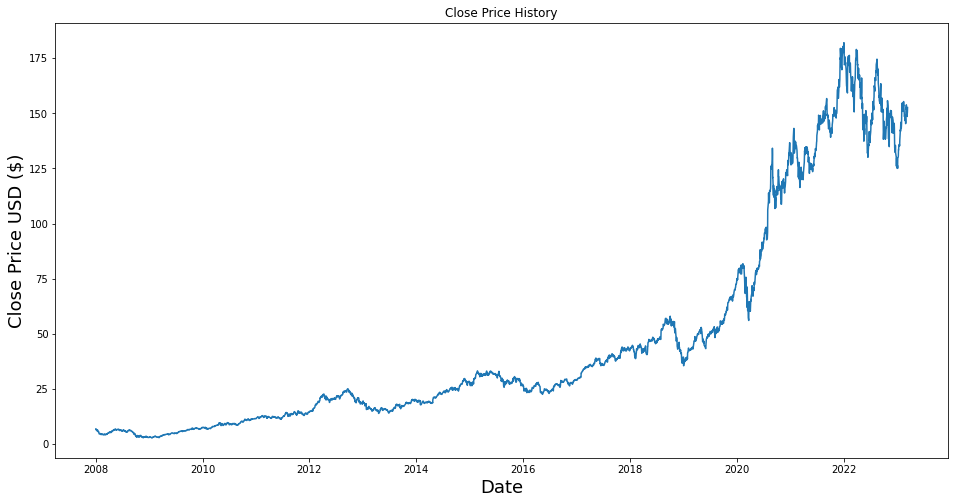

In [260]:
#Plotting the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

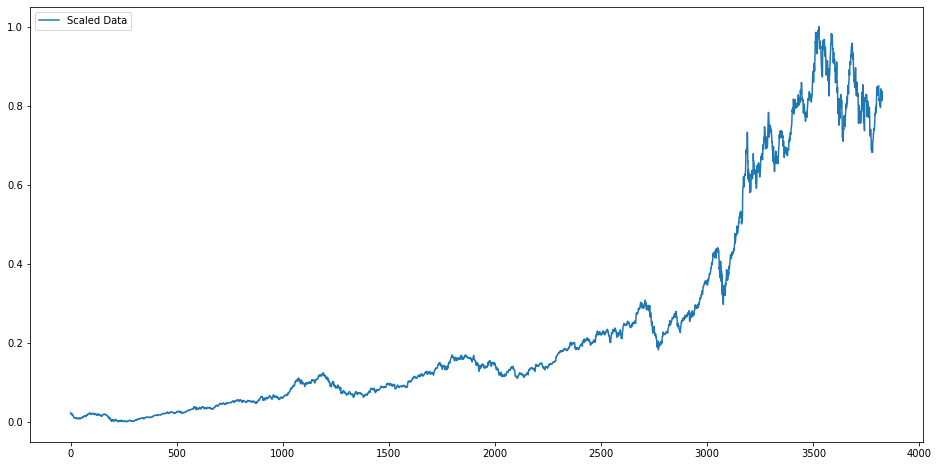

In [261]:
#Scale the data and plot the scaled data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

#plot the scaled data from day 0 to current day
plt.figure(figsize=(16,8))
plt.plot(scaled_data, label='Scaled Data')
plt.legend(loc='upper left')
plt.show()

In [262]:
print(scaled_data)

[[0.02324395]
 [0.02326189]
 [0.02029661]
 ...
 [0.81302014]
 [0.8240124 ]
 [0.8358416 ]]


In [263]:
close_values = scaler.inverse_transform(scaled_data)
print(close_values)

[[  6.95857096]
 [  6.96178579]
 [  6.43035698]
 ...
 [148.5       ]
 [150.47000122]
 [152.58999634]]


In [264]:
#Create a new dataframe with only the 'Close' column
data = data.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on (80% of the data)
training_size = int(np.ceil( len(scaled_data) * .8 ))
test_size = int(np.ceil( len(scaled_data) * .2 ))

#2860 is 80 percent of the total number of rows in the dataset
print("Total Rows in Training Dataset: ", training_size)
print("Total Rows in Testing Dataset: ", test_size)

Total Rows in Training Dataset:  3061
Total Rows in Testing Dataset:  766


In [265]:
#Split the data in to training and testing data, 80% training and 20% testing starting from the beginning of the dataset
train_data = scaled_data[0:training_size , :] #From 0 to 3061
test_data = scaled_data[training_size:len(scaled_data), :] #From 3061 to the end

#remove null values
train_data = train_data[~np.isnan(train_data).any(axis=1)]
test_data = test_data[~np.isnan(test_data).any(axis=1)]

#print the shape of the training and testing data
print("Training Data Shape: ", train_data.shape)
print("Testing Data Shape: ", test_data.shape)

Training Data Shape:  (3061, 1)
Testing Data Shape:  (765, 1)


In [266]:
#Time step is the number of days we want to look back to predict the next closing price
#We need use the training data to create the x_train and y_train data sets where x_train is the closing price of the previous 14 years and y_train is the closing price of the next day
#if data is 120, 130, 125, 140, 134, and 150 then x_train would be 120, 130, 125, 140, 134 and y_train would be 150
#We will do the same for the test data and then check the accuracy of the model

#Function to create the x_train and y_train data sets
def create_dataset (dataset, time_step=1):
    dataX, dataY = [], []
    #Loop through the data and create the x_train and y_train data sets
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] #Start from 0 to time_step and add to a
        dataX.append(a) #Store the values from 0 to time_step in dataX
        dataY.append(dataset[i+time_step, 0]) #Store the value of the next day in dataY
    return np.array(dataX), np.array(dataY) #Return the training data and the testing data as numpy arrays

In [267]:
#time step is the number of days we want to look back to predict the next closing price and we will use 30 days for this model (Hyperparamater Tuning) 
time_step = 30

#Create the training data set
x_train, y_train = create_dataset(train_data, time_step)

#180 features and 2550 rows
print (x_train.shape) #the training data should have 30 features for 30 days
print (y_train.shape)

(3030, 30)
(3030,)


In [268]:
#Create the testing data set
x_test, y_test = create_dataset(test_data, time_step)

#180 features an 730 rows
print(x_test.shape)
print(y_test.shape)

(734, 30)
(734,)


In [269]:
#Reshape the data to fit the LSTM model
#The LSTM model expects the data to be in the form of [samples, time steps, features] and right now our data is in the form [samples, features]
#The last two parameters are fed to the LSTM model as input
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [270]:
#Create a LSTM model with 1 layer of 256 neurons and 10 days look back
model = Sequential()
#Add the first LSTM layer and c
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))

#One final output layer to predict the closing price
model.add(Dense(1))

#Compile the model with the adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mean_squared_error')

In [271]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 30, 128)           66560     
                                                                 
 dropout_6 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_16 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [272]:
#Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64, verbose=1)

Epoch 1/20
48/48 [==============================] - 18s 250ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 2/20
48/48 [==============================] - 10s 216ms/step - loss: 2.0209e-04 - val_loss: 0.0011
Epoch 3/20
48/48 [==============================] - 5s 108ms/step - loss: 1.8161e-04 - val_loss: 0.0012
Epoch 4/20
48/48 [==============================] - 6s 125ms/step - loss: 1.7826e-04 - val_loss: 0.0010
Epoch 5/20
48/48 [==============================] - 5s 97ms/step - loss: 1.5490e-04 - val_loss: 9.7141e-04
Epoch 6/20
48/48 [==============================] - 6s 117ms/step - loss: 1.4716e-04 - val_loss: 0.0010
Epoch 7/20
48/48 [==============================] - 5s 104ms/step - loss: 1.4826e-04 - val_loss: 9.1862e-04
Epoch 8/20
48/48 [==============================] - 5s 97ms/step - loss: 1.3887e-04 - val_loss: 8.9257e-04
Epoch 9/20
48/48 [==============================] - 6s 126ms/step - loss: 1.3016e-04 - val_loss: 0.0030
Epoch 10/20
48/48 [==============================] - 5s 

In [273]:
#Get the training data predictions and convert to the original scale
train_predict = model.predict(x_train)
train_predict = scaler.inverse_transform(train_predict)

95/95 [==============================] - 4s 32ms/step


In [274]:
#Get the testing data predictions and convert to the original scale
test_predict = model.predict(x_test)
test_predict = scaler.inverse_transform(test_predict)

23/23 [==============================] - 0s 19ms/step


In [275]:
#Get performance metrics for the model on the training and testing data using root mean squared error (RMSE)
trainScore = math.sqrt(mean_squared_error(y_train, train_predict))
testScore = math.sqrt(mean_squared_error(y_test, test_predict))

print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 30.36 RMSE
Test Score: 140.60 RMSE


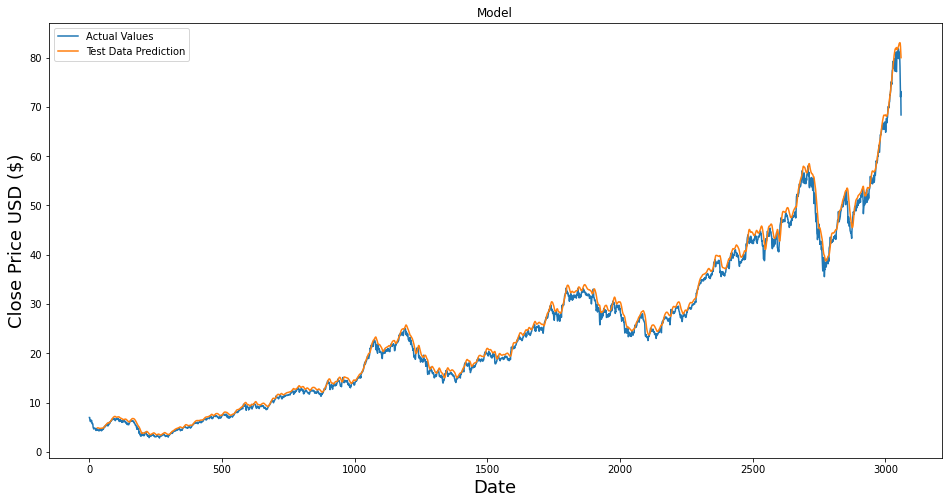

In [276]:
#Plot the train data and prediction
#Training Data Shape:  (3061, 1)
#Plot the data
look_back = 30

trainPredictPlot = np.empty_like(scaled_data) #Create an empty array the same size as the scaled data
trainPredictPlot[:, :] = np.nan #Fill the empty array with NaN values
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict #Fill the array with the training data predictions

#Plot the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(scaler.inverse_transform(scaled_data[:3060]))
plt.plot(trainPredictPlot[:3060])
plt.legend(['Actual Values', 'Test Data Prediction'], loc='upper left')
plt.show()



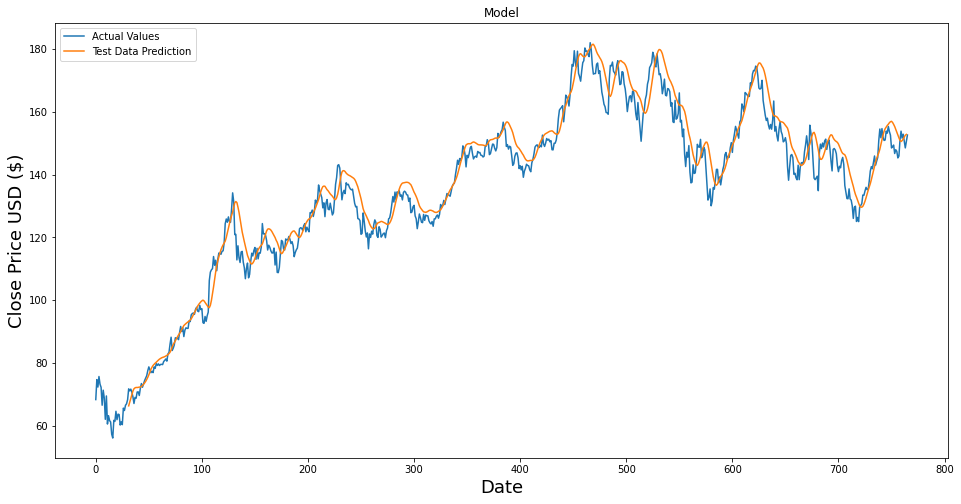

In [277]:
#Plot the testing data and the model predictions
testPredictPlot = np.empty_like(scaled_data) #Create an empty array the same size as the scaled data
testPredictPlot[:, :] = np.nan  #Fill the empty array with NaN values
testPredictPlot[len(train_predict)+(look_back*2)+1:len(scaled_data)-1, :] = test_predict #Fill the array with the testing data predictions

#Plot the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(scaler.inverse_transform(scaled_data[3060:]))
plt.plot(testPredictPlot[3060:])
plt.legend(['Actual Values', 'Test Data Prediction'], loc='upper left')
plt.show()

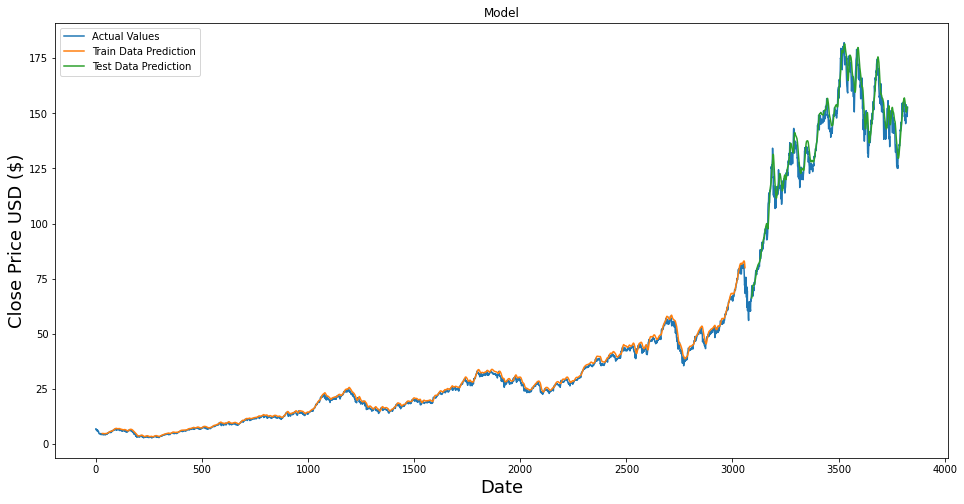

In [278]:

trainPredictPlot = np.empty_like(scaled_data) #Create an empty array the same size as the scaled data
trainPredictPlot[:, :] = np.nan #Fill the empty array with NaN values
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict #Fill the array with the training data predictions

#Plot the testing data and the model predictions
testPredictPlot = np.empty_like(scaled_data) #Create an empty array the same size as the scaled data
testPredictPlot[:, :] = np.nan  #Fill the empty array with NaN values
testPredictPlot[len(train_predict)+(look_back*2)+1:len(scaled_data)-1, :] = test_predict #Fill the array with the testing data predictions

#Plot the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(trainPredictPlot)
#plt.plot(y_test)
plt.plot(testPredictPlot)
plt.legend(['Actual Values', 'Train Data Prediction', 'Test Data Prediction'], loc='upper left')
plt.show()

In [279]:
print(len(train_data))
print(len(test_data))

3061
765


In [280]:
#Get the last 30 days of the training data and convert it to an array (765 - 30 = 685)
x_input = test_data[735:].reshape(1,-1) #Predict the closing price for the next 30 days starting from 685
x_input.shape

(1, 30)

In [281]:
#Convert the data to a list
temp_input = list(x_input)
temp_input = temp_input[0].tolist() #Convert the data to a list

print(len(temp_input)) #The length of the list should be 30 as we are predicting the closing price for the next 30 days

30


In [282]:
#Predict the closing price for the next 30 days
from numpy import array

lst_output = []
n_steps = 30
i = 0
while(i<30):
      #if the length of the list is greater than 30, then we will shift by 1 day and take new output as the input for the next day prediction
      if(len(temp_input)>30): #
          #print(temp_input)
          x_input = np.array(temp_input[1:])
          print("{} day input {}".format(i,x_input))
          x_input = x_input.reshape(1,-1)
          x_input = x_input.reshape((1, n_steps, 1))
          #print(x_input)
          yhat = model.predict(x_input, verbose=0)
          print("{} day output {}".format(i,yhat))
          temp_input.extend(yhat[0].tolist())
          temp_input = temp_input[1:]
          #print(temp_input)
          lst_output.extend(yhat.tolist())
          i=i+1
      #If the length of the list is less than 30, then we will add the last 30 days to the list and predict the next 30 days
      else:
          x_input = x_input.reshape((1, n_steps,1)) #Reshape the data to fit the model
          yhat = model.predict(x_input, verbose=0)  #Predict the closing price for the next 30 days
          print(yhat[0]) #Print the predicted closing price
          temp_input.extend(yhat[0].tolist()) #Add the predicted closing price to the list
          print(len(temp_input)) #The length of the list should be 30
          lst_output.extend(yhat.tolist()) #Add the predicted closing price to previous list (temp_input)
          i=i+1 

[0.8403504]
31
1 day input [0.79589005 0.82596538 0.84649909 0.83104295 0.84733602 0.83210313
 0.8262443  0.82702547 0.84287223 0.8392453  0.85113035 0.84209106
 0.83561845 0.81290852 0.81530789 0.81804195 0.8030323  0.80978384
 0.80693816 0.79522049 0.79856842 0.82713709 0.84276061 0.83031763
 0.83740395 0.82468196 0.81302014 0.8240124  0.8358416  0.84035039]
1 day output [[0.8429928]]
2 day input [0.82596538 0.84649909 0.83104295 0.84733602 0.83210313 0.8262443
 0.82702547 0.84287223 0.8392453  0.85113035 0.84209106 0.83561845
 0.81290852 0.81530789 0.81804195 0.8030323  0.80978384 0.80693816
 0.79522049 0.79856842 0.82713709 0.84276061 0.83031763 0.83740395
 0.82468196 0.81302014 0.8240124  0.8358416  0.84035039 0.84299278]
2 day output [[0.8460561]]
3 day input [0.84649909 0.83104295 0.84733602 0.83210313 0.8262443  0.82702547
 0.84287223 0.8392453  0.85113035 0.84209106 0.83561845 0.81290852
 0.81530789 0.81804195 0.8030323  0.80978384 0.80693816 0.79522049
 0.79856842 0.82713709 

In [283]:
day_new = np.arange(1,31) #Create a new array with the previous 30 days
day_pred = np.arange(31,61) #Create a new array with the next 30 days


In [284]:
#Print the predicted closing price for the next 30 days
print(scaler.inverse_transform(lst_output))

[[153.39804829]
 [153.87161042]
 [154.42061007]
 [155.01901476]
 [155.65146354]
 [156.31012638]
 [156.98473771]
 [157.67299017]
 [158.37046134]
 [159.07407477]
 [159.78062579]
 [160.49046692]
 [161.20136559]
 [161.91434728]
 [162.62876038]
 [163.34566243]
 [164.06250039]
 [164.77880424]
 [165.49582379]
 [166.21141193]
 [166.92619891]
 [167.64067611]
 [168.3534762 ]
 [169.06201411]
 [169.76708031]
 [170.47118512]
 [171.17250188]
 [171.87269701]
 [172.57164232]
 [173.26724412]]


In [285]:
new_data = yf.download('AAPL','2023-03-16')

[*********************100%***********************]  1 of 1 completed


In [286]:
#Create an array from date 2023-03-15 to 30 days in future 
future_dates = pd.date_range(start='2023-03-16', end='2023-04-14')
#print(future_dates)

#convert it to an array
future_dates = future_dates.to_numpy()
print(future_dates)

future_dates.shape

['2023-03-16T00:00:00.000000000' '2023-03-17T00:00:00.000000000'
 '2023-03-18T00:00:00.000000000' '2023-03-19T00:00:00.000000000'
 '2023-03-20T00:00:00.000000000' '2023-03-21T00:00:00.000000000'
 '2023-03-22T00:00:00.000000000' '2023-03-23T00:00:00.000000000'
 '2023-03-24T00:00:00.000000000' '2023-03-25T00:00:00.000000000'
 '2023-03-26T00:00:00.000000000' '2023-03-27T00:00:00.000000000'
 '2023-03-28T00:00:00.000000000' '2023-03-29T00:00:00.000000000'
 '2023-03-30T00:00:00.000000000' '2023-03-31T00:00:00.000000000'
 '2023-04-01T00:00:00.000000000' '2023-04-02T00:00:00.000000000'
 '2023-04-03T00:00:00.000000000' '2023-04-04T00:00:00.000000000'
 '2023-04-05T00:00:00.000000000' '2023-04-06T00:00:00.000000000'
 '2023-04-07T00:00:00.000000000' '2023-04-08T00:00:00.000000000'
 '2023-04-09T00:00:00.000000000' '2023-04-10T00:00:00.000000000'
 '2023-04-11T00:00:00.000000000' '2023-04-12T00:00:00.000000000'
 '2023-04-13T00:00:00.000000000' '2023-04-14T00:00:00.000000000']


(30,)

In [287]:
#Create empty array of size 30
actual_thirtydays_values = np.empty((30,1))

#Fill the empty array with NaN values
actual_thirtydays_values[:] = np.nan

for i in range(0,30):
  try:
    actual_thirtydays_values[i] = new_data['Close'][i]
  except:
    actual_thirtydays_values[i] = np.nan
    

#Add the date and the actual values to the dataframe
actual_thirtydays_values = pd.DataFrame(actual_thirtydays_values, columns=['Close'])
actual_thirtydays_values['Date'] = future_dates
actual_thirtydays_values = actual_thirtydays_values.set_index('Date')

print (actual_thirtydays_values)

                 Close
Date                  
2023-03-16  155.850006
2023-03-17  155.000000
2023-03-18  157.399994
2023-03-19         NaN
2023-03-20         NaN
2023-03-21         NaN
2023-03-22         NaN
2023-03-23         NaN
2023-03-24         NaN
2023-03-25         NaN
2023-03-26         NaN
2023-03-27         NaN
2023-03-28         NaN
2023-03-29         NaN
2023-03-30         NaN
2023-03-31         NaN
2023-04-01         NaN
2023-04-02         NaN
2023-04-03         NaN
2023-04-04         NaN
2023-04-05         NaN
2023-04-06         NaN
2023-04-07         NaN
2023-04-08         NaN
2023-04-09         NaN
2023-04-10         NaN
2023-04-11         NaN
2023-04-12         NaN
2023-04-13         NaN
2023-04-14         NaN


In [288]:
#add the predicted closing price to the actual closing price
actual_thirtydays_values['Predictions'] = scaler.inverse_transform(lst_output)

print(actual_thirtydays_values)

                 Close  Predictions
Date                               
2023-03-16  155.850006   153.398048
2023-03-17  155.000000   153.871610
2023-03-18  157.399994   154.420610
2023-03-19         NaN   155.019015
2023-03-20         NaN   155.651464
2023-03-21         NaN   156.310126
2023-03-22         NaN   156.984738
2023-03-23         NaN   157.672990
2023-03-24         NaN   158.370461
2023-03-25         NaN   159.074075
2023-03-26         NaN   159.780626
2023-03-27         NaN   160.490467
2023-03-28         NaN   161.201366
2023-03-29         NaN   161.914347
2023-03-30         NaN   162.628760
2023-03-31         NaN   163.345662
2023-04-01         NaN   164.062500
2023-04-02         NaN   164.778804
2023-04-03         NaN   165.495824
2023-04-04         NaN   166.211412
2023-04-05         NaN   166.926199
2023-04-06         NaN   167.640676
2023-04-07         NaN   168.353476
2023-04-08         NaN   169.062014
2023-04-09         NaN   169.767080
2023-04-10         NaN   170

In [289]:
#Calculate the accuracy from the actual closing price and the predicted closing price for the next 30 days

#calculate accuray by subtracting the actual closing price and the predicted closing price and divide by the actual closing price and multiply by 100 to get the percentage
accuracy = (actual_thirtydays_values['Close'] - actual_thirtydays_values['Predictions']) / actual_thirtydays_values['Close'] * 100

#add the absolute accuracy to the actual closing price and the predicted closing price 
actual_thirtydays_values['Accuracy'] = abs(accuracy)

print (actual_thirtydays_values)


                 Close  Predictions  Accuracy
Date                                         
2023-03-16  155.850006   153.398048  1.573281
2023-03-17  155.000000   153.871610  0.727993
2023-03-18  157.399994   154.420610  1.892874
2023-03-19         NaN   155.019015       NaN
2023-03-20         NaN   155.651464       NaN
2023-03-21         NaN   156.310126       NaN
2023-03-22         NaN   156.984738       NaN
2023-03-23         NaN   157.672990       NaN
2023-03-24         NaN   158.370461       NaN
2023-03-25         NaN   159.074075       NaN
2023-03-26         NaN   159.780626       NaN
2023-03-27         NaN   160.490467       NaN
2023-03-28         NaN   161.201366       NaN
2023-03-29         NaN   161.914347       NaN
2023-03-30         NaN   162.628760       NaN
2023-03-31         NaN   163.345662       NaN
2023-04-01         NaN   164.062500       NaN
2023-04-02         NaN   164.778804       NaN
2023-04-03         NaN   165.495824       NaN
2023-04-04         NaN   166.21141